In [6]:
import numpy as np
import sys
import matplotlib
from collections import defaultdict

%matplotlib inline


if "../.." not in sys.path:
  sys.path.append("../..") 
from env.blackjack import BlackjackEnv
from plotting import plotting


matplotlib.style.use('ggplot')

In [7]:
env = BlackjackEnv()

In [8]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is >= 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

In [9]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """
    
    # Maps states to values.
    V = {}    
    
    return_sums = defaultdict(float)
    return_counts = defaultdict(float)
    
    for _ in range(num_episodes):
        
        episode = []
        state = env.reset()
        
        # Play the game following policy. Each step in the episode is a tuple (state, action, reward)
        for t in range(100):
            action = policy(state)
            next_state, reward, done, _ = env.step(action)
            episode.append((state, action, reward))
            if done:
                break
            state = next_state
        
        # Find all states visited.
        states_in_episode = set([tuple(x[0]) for x in episode])
        
        for state in states_in_episode:
            
            first_occurrence_idx = next(i for i,x in enumerate(episode) if x[0] == state)
            return_after_idx = sum(x[2]*(discount_factor**i) for i,x in enumerate(episode[first_occurrence_idx:]))
            
            return_sums[state] += return_after_idx
            return_counts[state] +=1
            
            V[state] = return_sums[state] / return_counts[state]
        
    return V

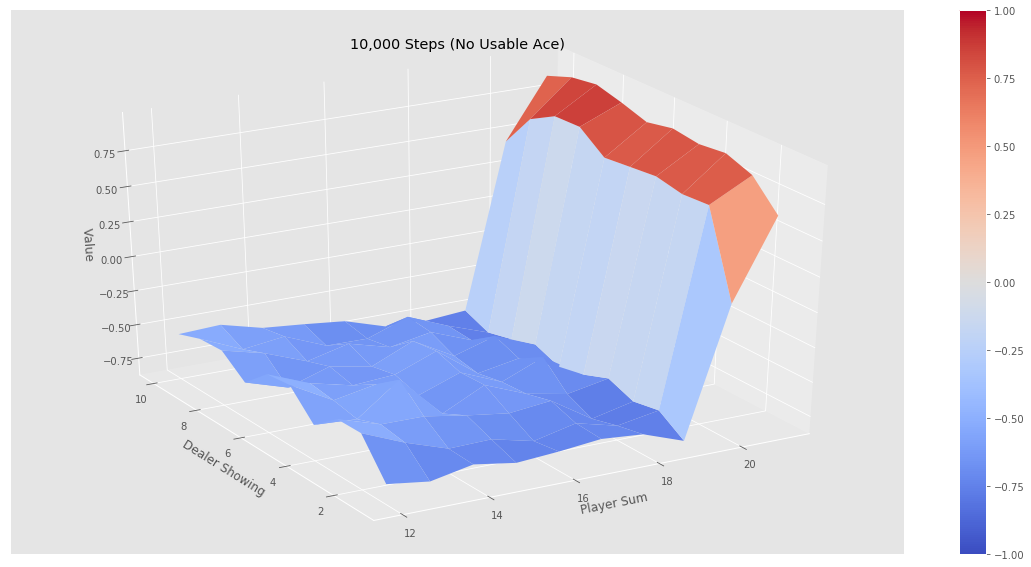

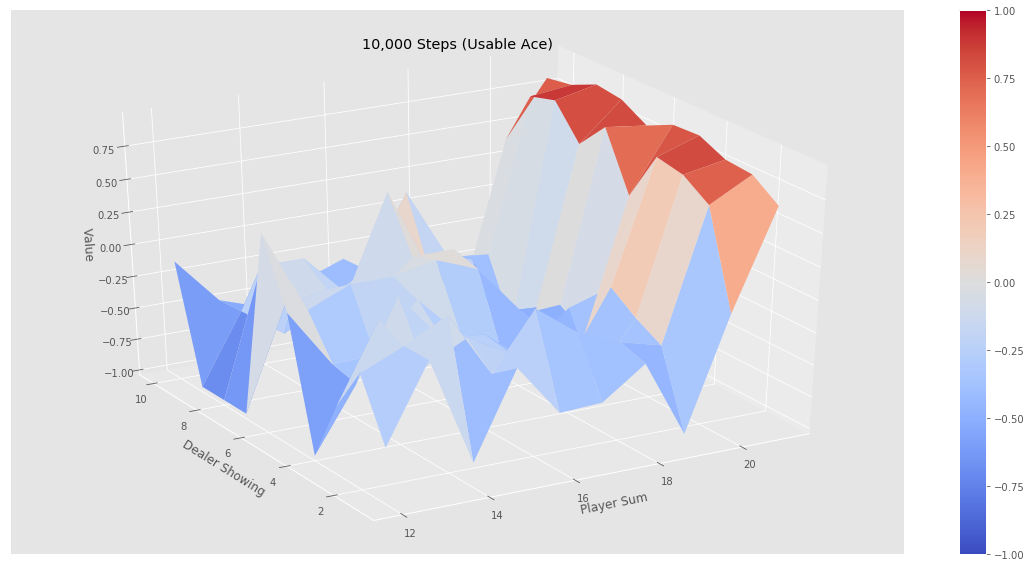

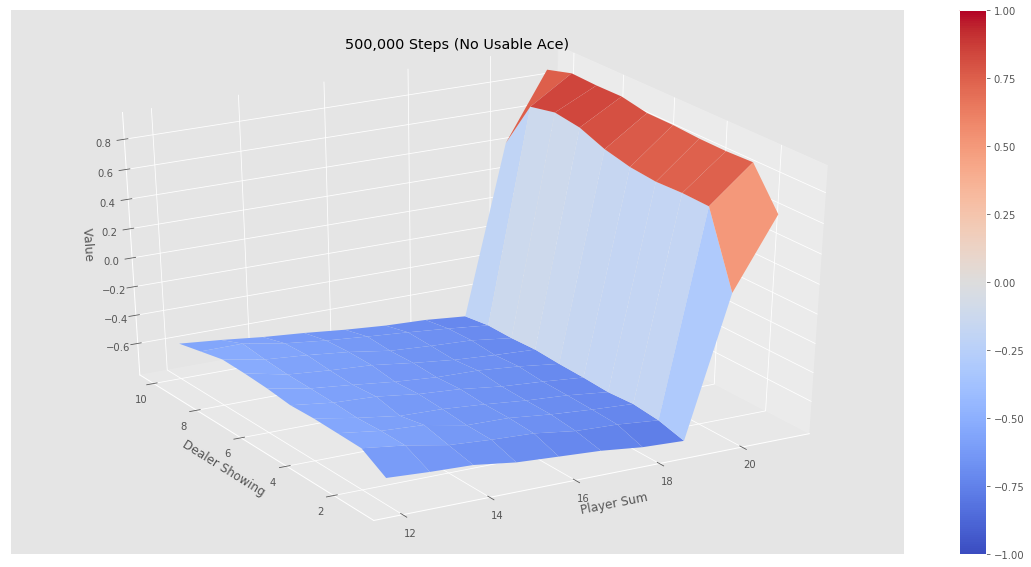

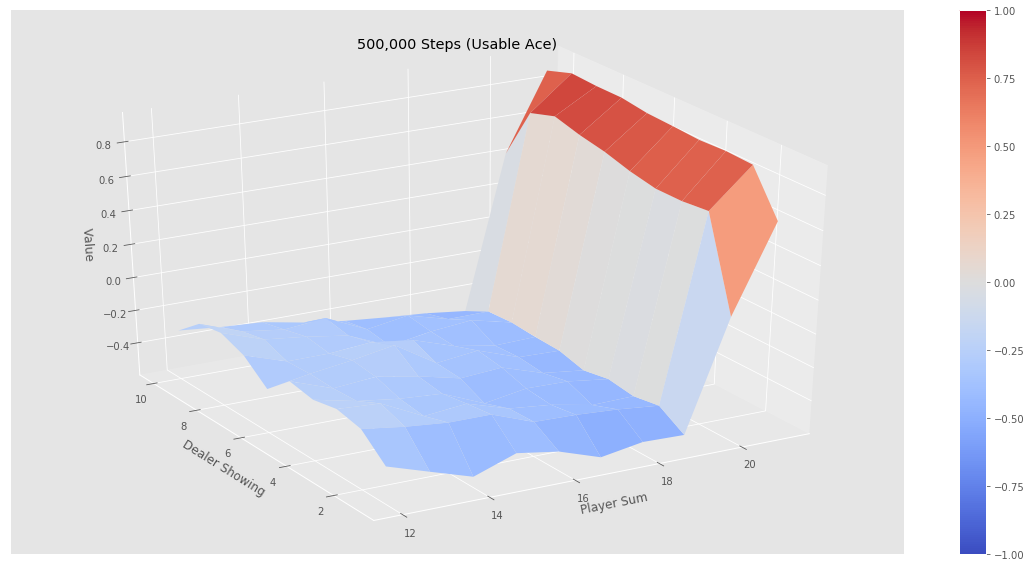

In [10]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")